In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [59]:

transactions_df = pd.read_csv(r'C:\Users\SIVABALAJI S\Desktop\ZEOTAP_Data\Transactions.csv')
products_df = pd.read_csv(r'C:\Users\SIVABALAJI S\Desktop\ZEOTAP_Data\Products (2).csv')
customers_df = pd.read_csv(r'C:\Users\SIVABALAJI S\Desktop\ZEOTAP_Data\Customers.csv')


In [60]:

print("Transactions Dataset:")
print(transactions_df.head())
print("\nProducts Dataset:")
print(products_df.head())
print("\nCustomers Dataset:")
print(customers_df.head())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Customers Dataset:
  CustomerID        

In [62]:

transactions_df.columns = transactions_df.columns.str.strip()
products_df.columns = products_df.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()


print("Transactions Dataset Columns:", transactions_df.columns.tolist())
print("Products Dataset Columns:", products_df.columns.tolist())
print("Customers Dataset Columns:", customers_df.columns.tolist())


Transactions Dataset Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']
Products Dataset Columns: ['ProductID', 'ProductName', 'Category', 'Price']
Customers Dataset Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']


In [63]:
# Combine datasets for analysis
merged_df = transactions_df.merge(products_df, on='ProductID', how='left')
merged_df = merged_df.merge(customers_df, on='CustomerID', how='left')



In [64]:

print("\nMerged Dataset Info:")
print(merged_df.info())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


In [65]:

missing_values = merged_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64



Top Products by Sales:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


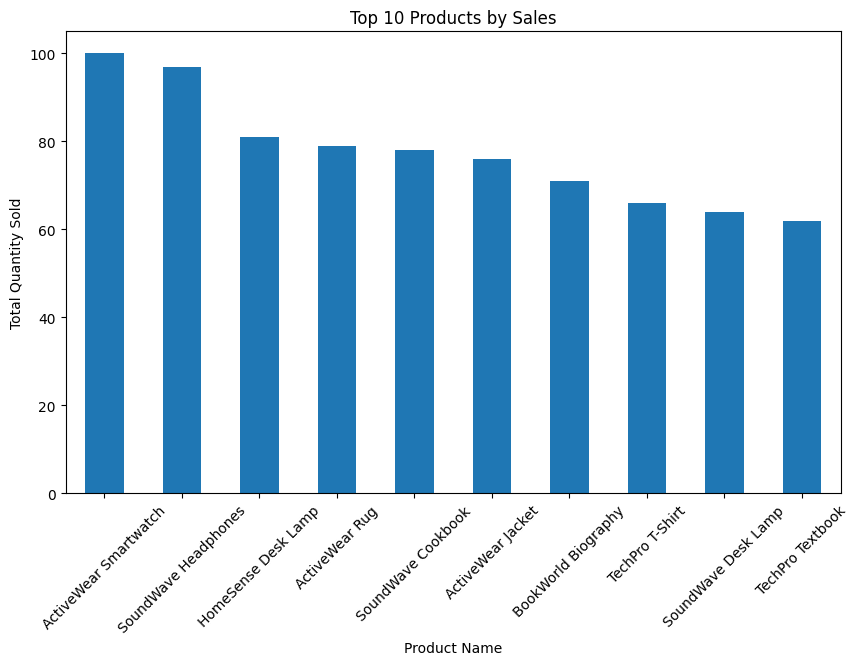

In [66]:
# 1. Sales Distribution by Product
product_sales = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print("\nTop Products by Sales:")
print(product_sales.head())
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [67]:

print("Merged Dataset Columns:", merged_df.columns)


if 'Price_x' in merged_df.columns:
    merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Price_x']
elif 'Price' in merged_df.columns:
    merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Price']
else:
    print("Error: Price column not found in the merged dataset.")


Merged Dataset Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')



Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: Revenue, dtype: float64


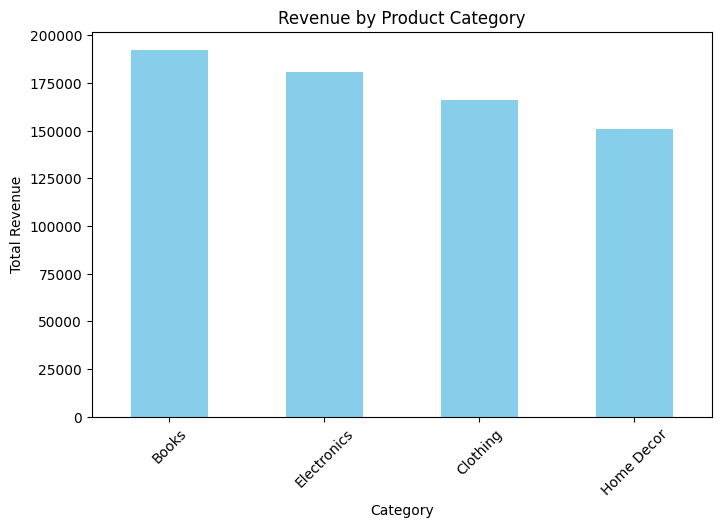

In [68]:
# 2. Revenue by Product Category
category_revenue = merged_df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

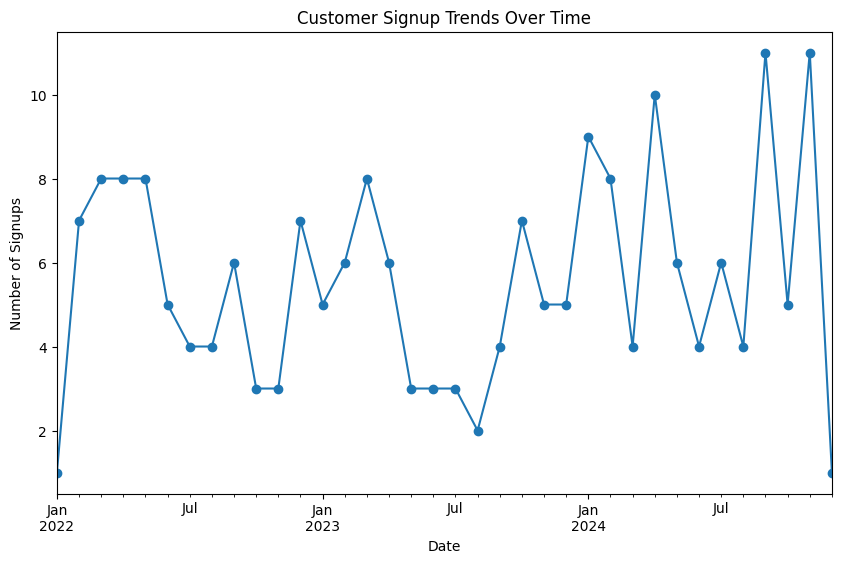

In [69]:
# 3. Customer Demographics Analysis - Signup Trends Over Time
if 'SignupDate' in customers_df.columns:
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    signup_trends = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
    signup_trends.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title('Customer Signup Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Signups')
    plt.show()
else:
    print("The 'SignupDate' column is not available in the customers dataset.")





Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: Revenue, dtype: float64


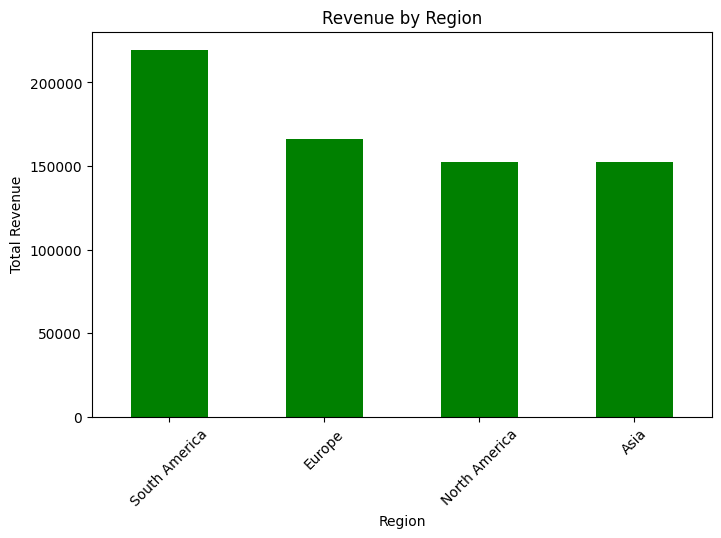

In [70]:
# 4. Regional Sales Analysis
region_sales = merged_df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_sales)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='green')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Revenue Contribution by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: Revenue, dtype: float64


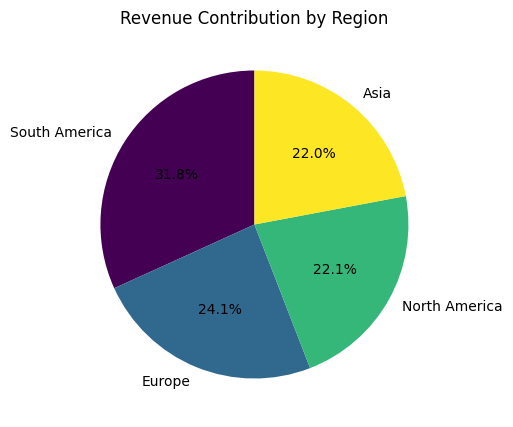

In [71]:
# 5. Customer Contribution to Revenue by Region
region_revenue = merged_df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print("\nRevenue Contribution by Region:")
print(region_revenue)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title('Revenue Contribution by Region')
plt.ylabel('')
plt.show()


